In [120]:
import pandas as pd
import numpy as np
from  datetime import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_rows',100)
pd.set_option('display.min_rows',100)
pd.set_option('display.max_columns',150)

In [121]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False)

In [122]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [123]:
grade = data.groupby('grade')

In [124]:
grade.agg(['count','mean','median','std'])['int_rate']

,count,mean,median,std
grade,,,,
A,433027,7.084545,7.24,0.984465
B,663557,10.675806,10.75,1.238302
C,650053,14.143689,13.99,1.251283
D,324424,18.143067,17.99,1.676964
E,135639,21.829653,21.48,2.703925
F,41800,25.454091,24.89,2.928144
G,12168,28.074255,28.18,2.804587


In [125]:
grade.agg(['count','mean','median','std','sum'])['loan_amnt']

,count,mean,median,std,sum
grade,,,,,
A,433027,14603.343210,12000.0,9107.975657,6.323642e+09
B,663557,14173.338199,12000.0,8957.012601,9.404818e+09
C,650053,15038.083318,13000.0,9203.950054,9.775551e+09
D,324424,15711.983007,14400.0,9250.612823,5.097344e+09
E,135639,17453.078392,16000.0,9363.276694,2.367318e+09
F,41800,19124.646531,18175.0,9166.366254,7.994102e+08
G,12168,20383.988741,19800.0,8994.472986,2.480324e+08


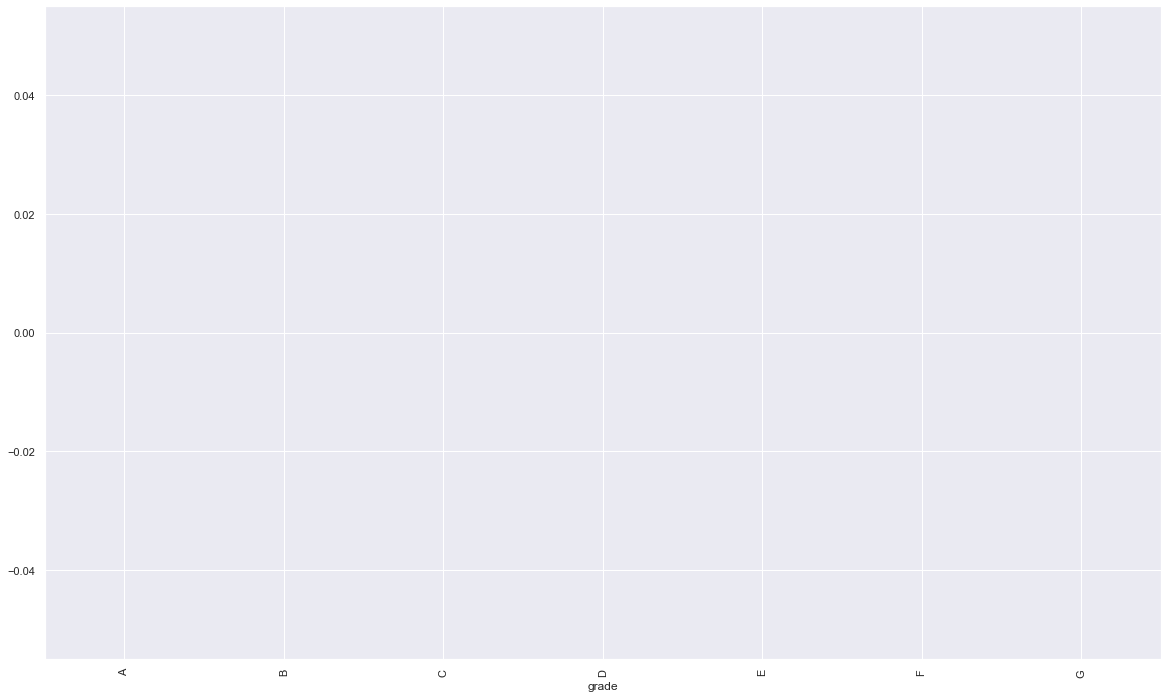

In [126]:
# loan issued amount breakout by grade
grade['loan_amnt'].sum().apply(lambda x: x/sum(data['loan_amnt'])).plot.bar()

In [127]:
# loan issued count breakout by grade
grade['loan_amnt'].count().apply(lambda x: x/#number of rows).plot.bar()

SyntaxError: unexpected EOF while parsing (<ipython-input-127-56a965f63ce4>, line 2)

In [ ]:
# interest rate and grade boxplot
data[['grade','int_rate']].boxplot(by='grade',column='int_rate')

In [ ]:
# 33 rows seem to have missing values across the board- removing those for EDA
#data.isna().sum()

In [ ]:
# dropping rows with chronic na issues
data = data.dropna(axis = 0, how = 'all', subset = ['issue_d'])

In [ ]:
#convert date issued to date format
data['issue_d'] = data['issue_d'].apply(lambda x: dt.strptime(x,'%b-%Y').date())

In [ ]:
#convert column from object to date
data['issue_d'] = pd.to_datetime(data['issue_d'])

In [ ]:
#loan issue amount by year
data.groupby(data.issue_d.dt.year).agg('sum')['loan_amnt'].plot.bar(color = 'b')

In [ ]:
# sum of loan amounts issued by grade by year
data.groupby([data.issue_d.dt.year,'grade'])['loan_amnt'].sum().unstack('grade').plot(kind='bar',stacked = True)

In [ ]:
# loan outcomes by percent/grade
status_group = data.loc[data.loan_status!='Current',:].groupby(['grade','loan_status'])['loan_status'].count()
status_group.groupby(level = 0).apply(lambda x: x/float(x.sum()))

In [ ]:

type(status_group.groupby(level = 0).apply(lambda x: x/float(x.sum())))

In [ ]:
# create ROI percent column
data['roi_dollar'] = data['total_pymnt'] - data['loan_amnt']
data['roi_percent'] = data['roi_dollar']/data['loan_amnt']
data.head()

In [ ]:
# ROI by class boxplot
data.loc[data.loan_status!='Current',:][['grade','roi_percent']].boxplot(by='grade',column='roi_percent')

In [ ]:
data.head()

In [ ]:
data['annual_inc'].describe()

In [ ]:
import seaborn as sns
data['annual_inc'] = data['annual_inc'].fillna(77992)
temp = data.drop(list(data[data['annual_inc']>10000000].index))



In [ ]:
#distribution of salary data
sns.distplot(temp['annual_inc'], bins=1000, kde=False)
plt.xlim(0,400000)

In [ ]:
#overview of income by loan grade
data.groupby('grade').describe()['annual_inc']

In [ ]:
temp = data[data.loan_status != 'Current']

In [ ]:
sns.scatterplot(x=temp['annual_inc'], y=temp['roi_percent'], alpha=.2)
plt.xlim(0,400000)

In [ ]:
scatter_features = ['loan_amnt','int_rate','dti','fico_range_low', 'open_acc']


for feature in scatter_features:
    plt.figure()
    sns.scatterplot(x=feature, y='roi_percent', data=temp)


In [ ]:
#boxplots comparing various features by loan grade
#order = temp.groupby('grade').median()['fico_range_low'].sort_values(ascending=False).index
order=['A','B','C','D','E','F','G']
sns.boxplot(x='grade', y='fico_range_low', data=temp, order=order, palette = sns.color_palette("Blues", n_colors=7))

In [ ]:
box_features = ['fico_range_low', 'fico_range_high', 'int_rate', 'open_acc']


for feature in box_features:
    plt.figure()
    sns.boxplot(x='grade', y=feature , data=temp, order=order, palette = sns.color_palette("Blues", n_colors=7))
   

In [ ]:
#income by loan grade

sns.boxplot(x='grade', y='annual_inc' , data=temp, 
            order=order, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,250000)

In [ ]:
sns.boxplot(x='grade', y='total_bal_ex_mort' , data=temp, 
            order=order, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,250000)


In [ ]:
#Box plot dti by loan grade

sns.boxplot(x='grade', y='dti' , data=temp, order=order, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,50)

(0, 50)

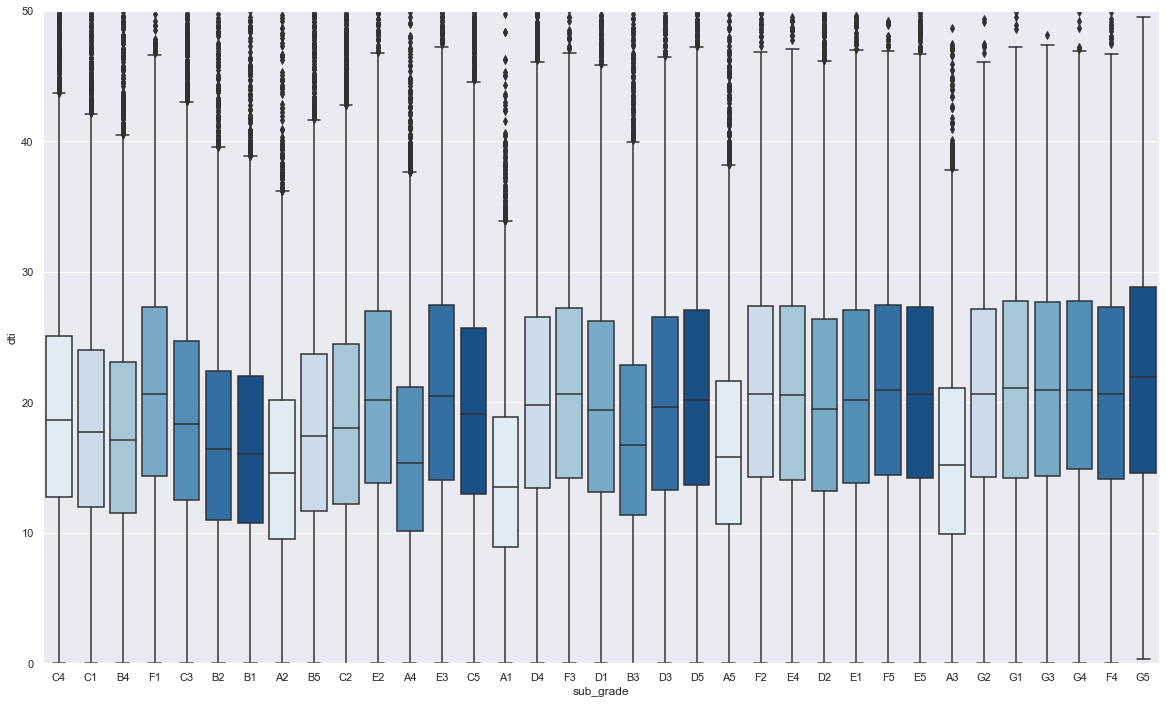

In [129]:
sns.boxplot(x='sub_grade', y='dti' , data=temp, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,50)

### Subprime Loan EDA

In [45]:
#filtering for just the subprime loans

grades = ['D','E','F','G']

df = data[data['grade'].isin(grades)]

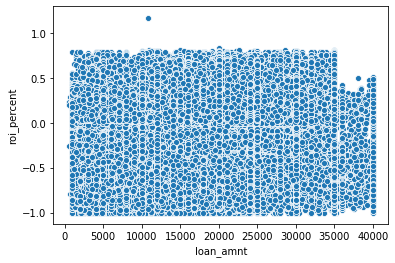

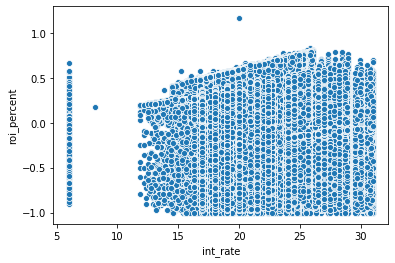

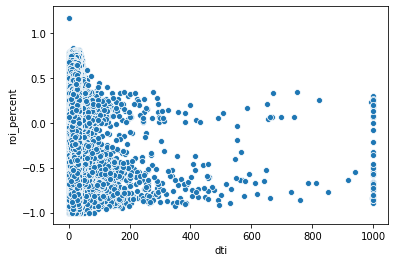

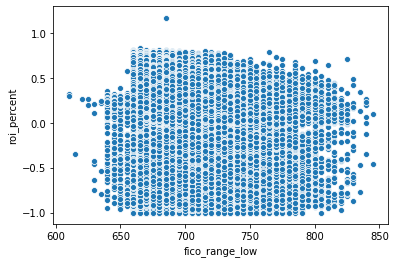

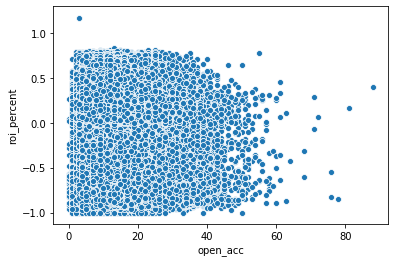

In [49]:
for feature in scatter_features:
    plt.figure()
    sns.scatterplot(x=feature, y='roi_percent', data=df)

<Figure size 432x288 with 0 Axes>

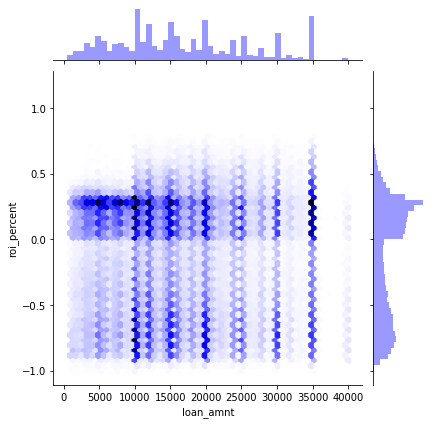

<Figure size 432x288 with 0 Axes>

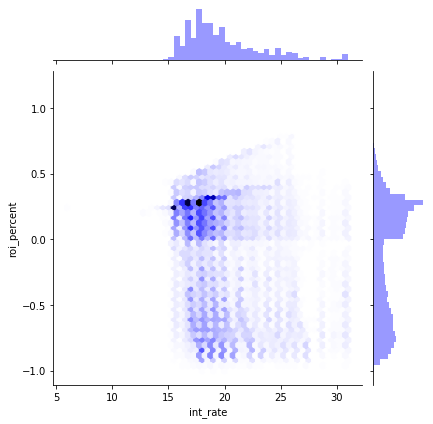

<Figure size 432x288 with 0 Axes>

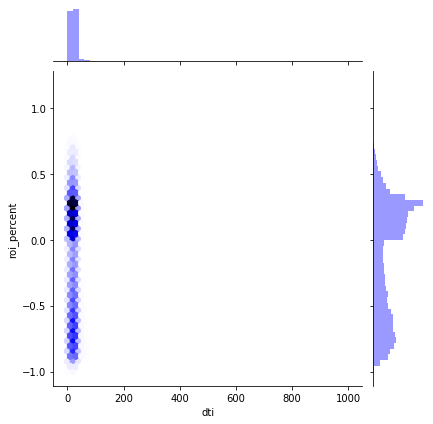

<Figure size 432x288 with 0 Axes>

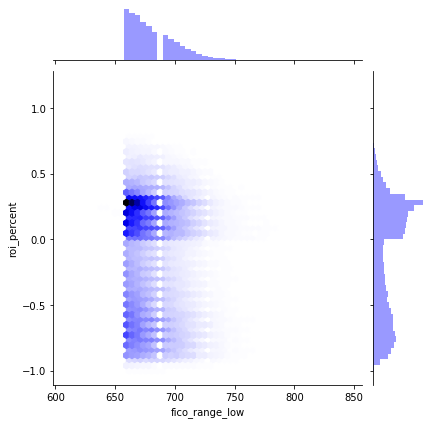

<Figure size 432x288 with 0 Axes>

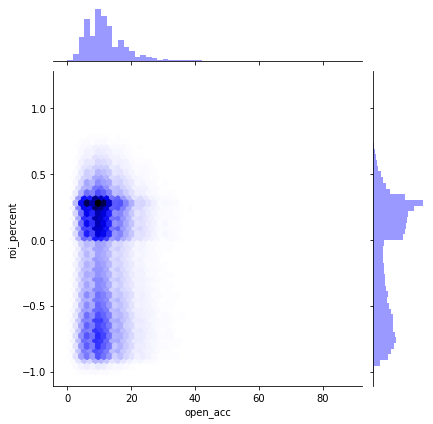

In [48]:
#jointplots for the scatter features to better visualize
for feature in scatter_features:
    plt.figure()
    sns.jointplot(x=feature, y='roi_percent',kind='hex', data=df, color='b')

In [50]:
df['dti'].describe()

count    513555.000000
mean         21.189589
std          15.544243
min           0.000000
25%          13.880000
50%          20.440000
75%          27.430000
max         999.000000
Name: dti, dtype: float64

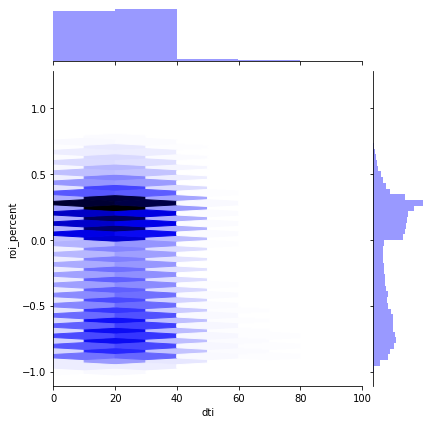

In [54]:
sns.jointplot(x='dti', y='roi_percent',kind='hex', data=df, color='b', xlim=(0,100))

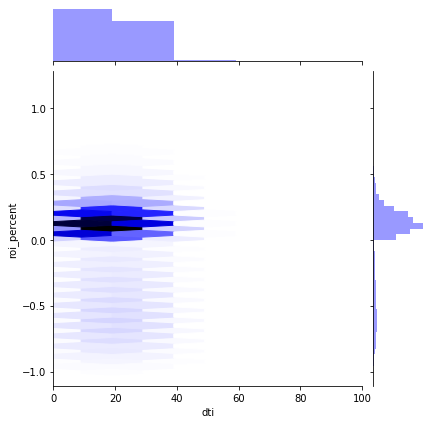

In [56]:
#comparing 
sns.jointplot(x='dti', y='roi_percent',kind='hex', data=temp, color='b', xlim=(0,100))

In [62]:
#location analysis on subprime
#fix dates on debt to GDP
#dti and loan status
#income and loan status
#distribution of dti vs number of open accounts
#revol_util and revol_bal 

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,roi_dollar,roi_percent
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.50,11740.50,10400.00,1340.50,0.0,0.0,0.000,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,...,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1340.50,0.128894
13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7 years,RENT,150000.0,Not Verified,2015-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,916xx,CA,9.39,0.0,Jun-2005,665.0,669.0,1.0,NaN,75.0,18.0,1.0,14052.0,40.7,27.0,w,0.0,0.0,9452.74,9452.74,3481.86,4351.98,0.0,1618.9,291.402,May-2017,471.70,NaN,Nov-2017,584.0,580.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,60.0,36247.0,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500.0,...,7.0,2014.0,5128.0,51.3,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,NaN,2.0,NaN,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,

### Location Analysis

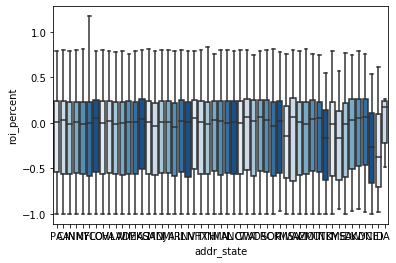

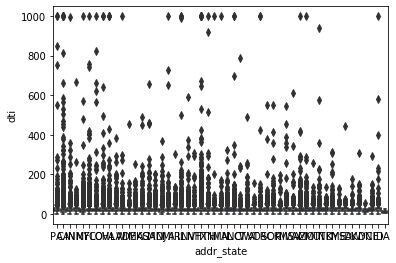

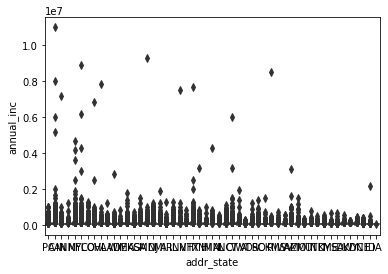

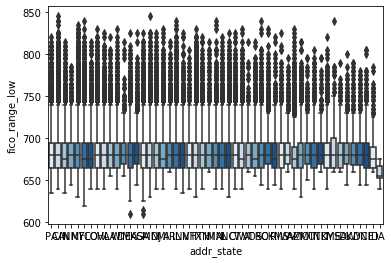

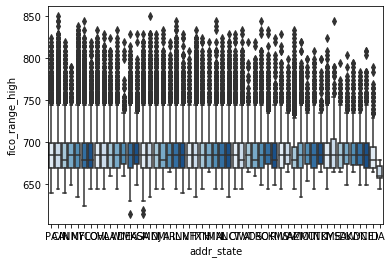

In [63]:

state_box = ['roi_percent','dti', 'annual_inc', 'fico_range_low', 'fico_range_high']

for feature in state_box:
    plt.figure()
    sns.boxplot(x='addr_state', y=feature , data=df, palette = sns.color_palette("Blues", n_colors=7))

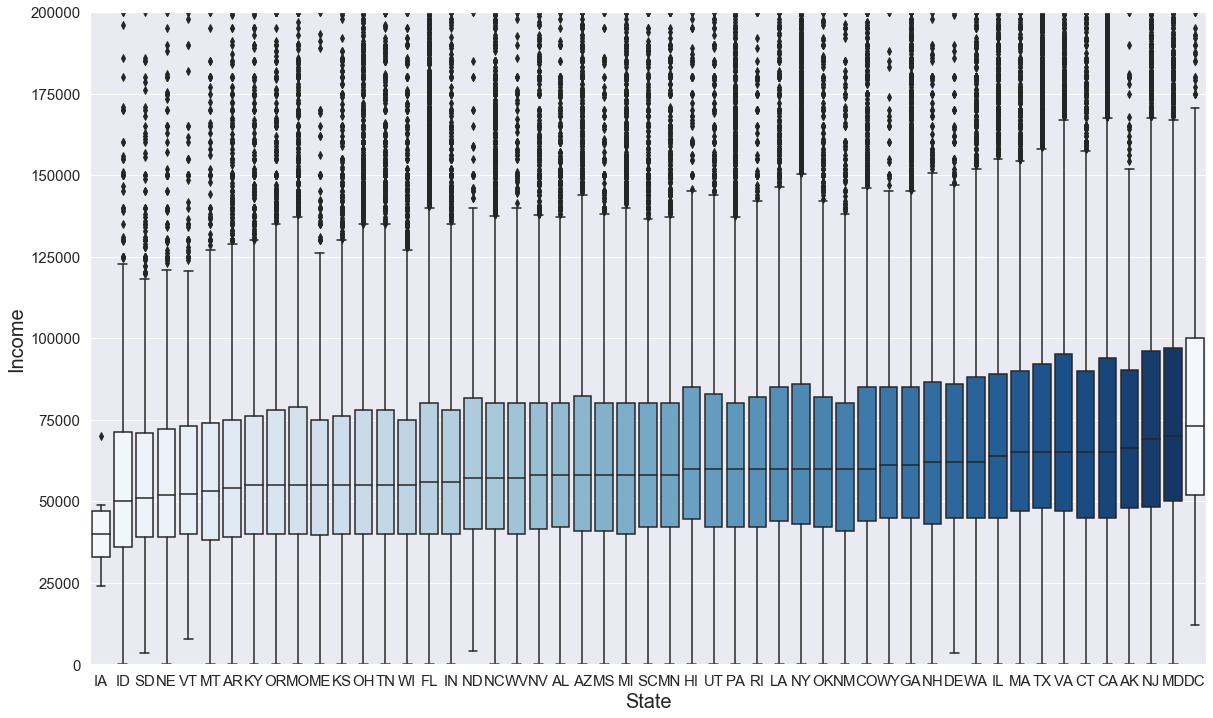

In [88]:
#Income by State
order= df.groupby('addr_state').median()['annual_inc'].sort_values().index
sns.boxplot(x='addr_state', y='annual_inc' , data=df,order=order, palette = sns.color_palette("Blues", n_colors=50))
plt.ylim(0,200000)
sns.set(rc={'figure.figsize':(20,12)})
plt.xlabel('State',fontsize = 20)
plt.ylabel('Income', fontsize=20)
plt.tick_params(labelsize=15)

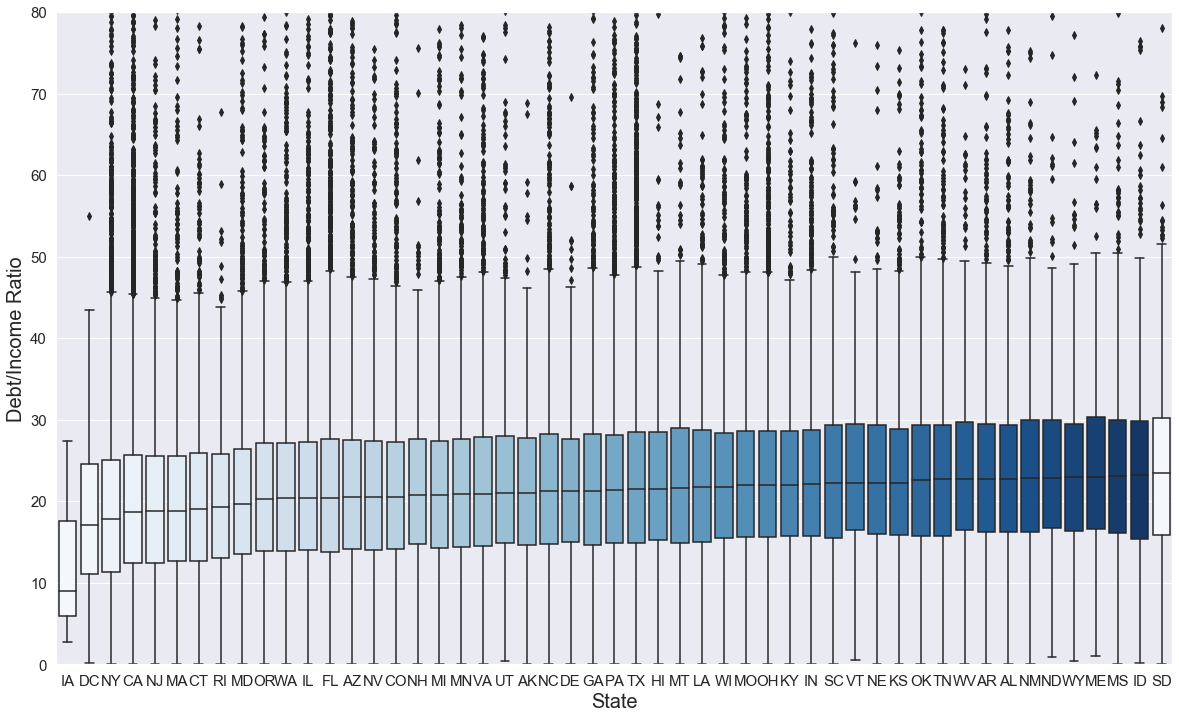

In [91]:
#DTI by State
order = df.groupby('addr_state').median()['dti'].sort_values().index
sns.boxplot(x='addr_state', y='dti' , data=df,order=order, palette = sns.color_palette("Blues", n_colors=50))
plt.ylim(0,80)
sns.set(rc={'figure.figsize':(20,12)})
plt.xlabel('State',fontsize = 20)
plt.ylabel('Debt/Income Ratio', fontsize=20)
plt.tick_params(labelsize=15)

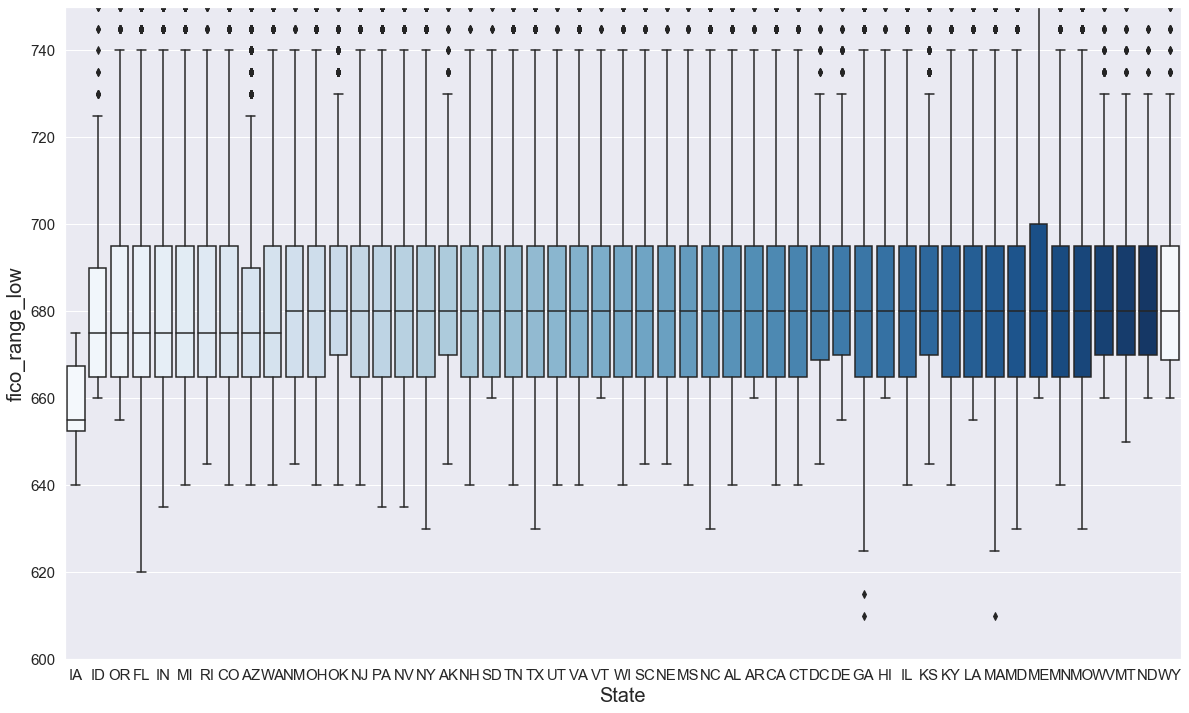

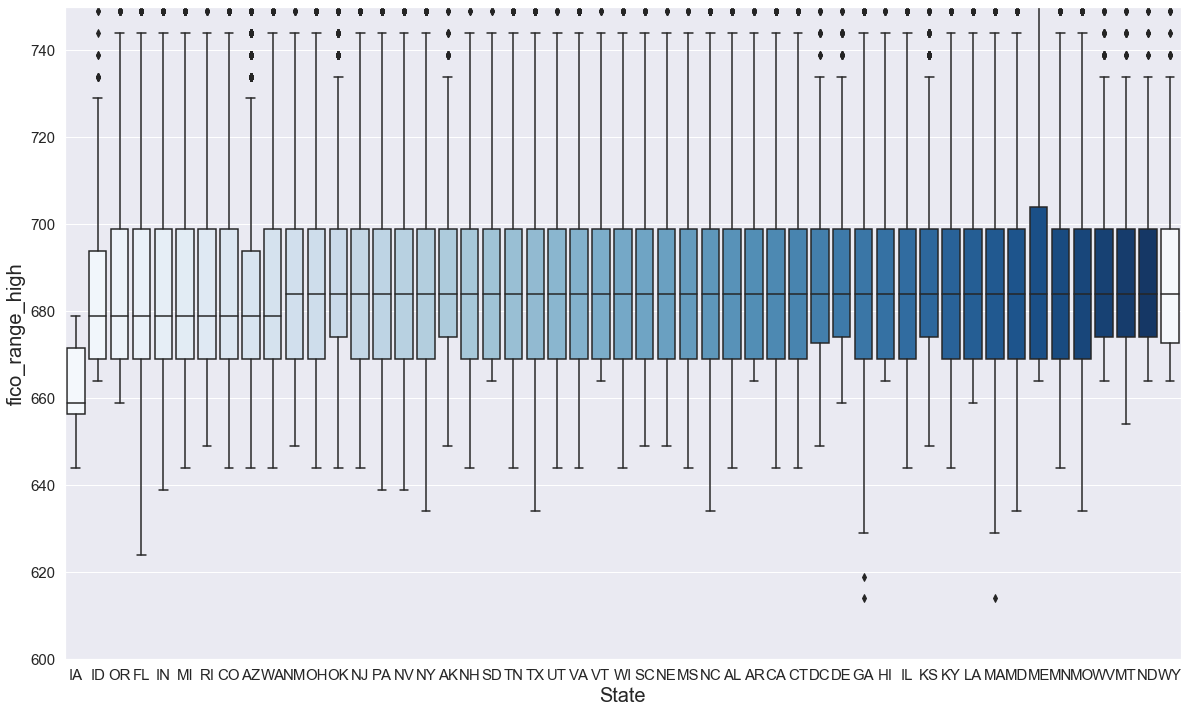

In [99]:
#FICO scores by state
fico = ['fico_range_low','fico_range_high']

#order = df.groupby('addr_state').median()['annual_inc'].sort_values().index

for f in fico:
    plt.figure()
    order = df.groupby('addr_state').median()[f].sort_values().index
    sns.boxplot(x='addr_state', y=f , data=df,order=order, palette = sns.color_palette("Blues", n_colors=50))
    plt.ylim(600,750)
    sns.set(rc={'figure.figsize':(20,12)})
    plt.xlabel('State',fontsize = 20)
    plt.ylabel(f, fontsize=20)
    plt.tick_params(labelsize=15)

### Loan Status Analysis

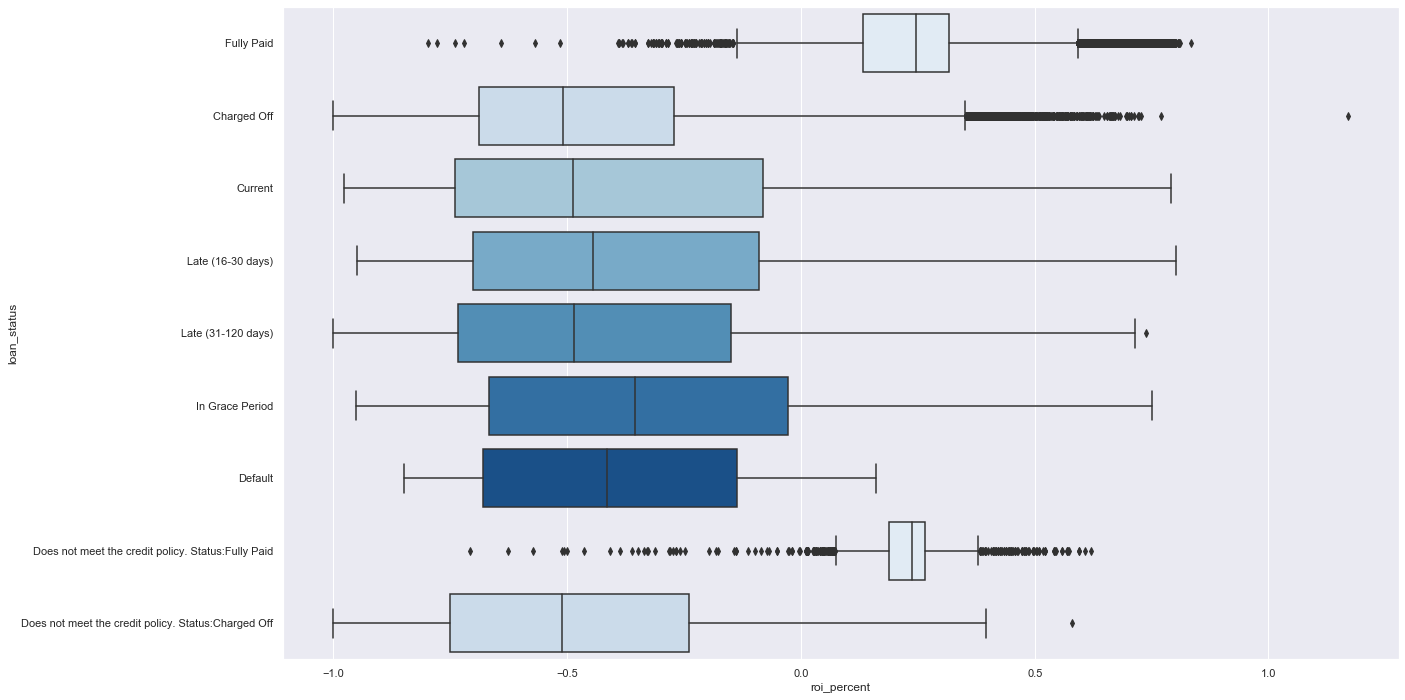

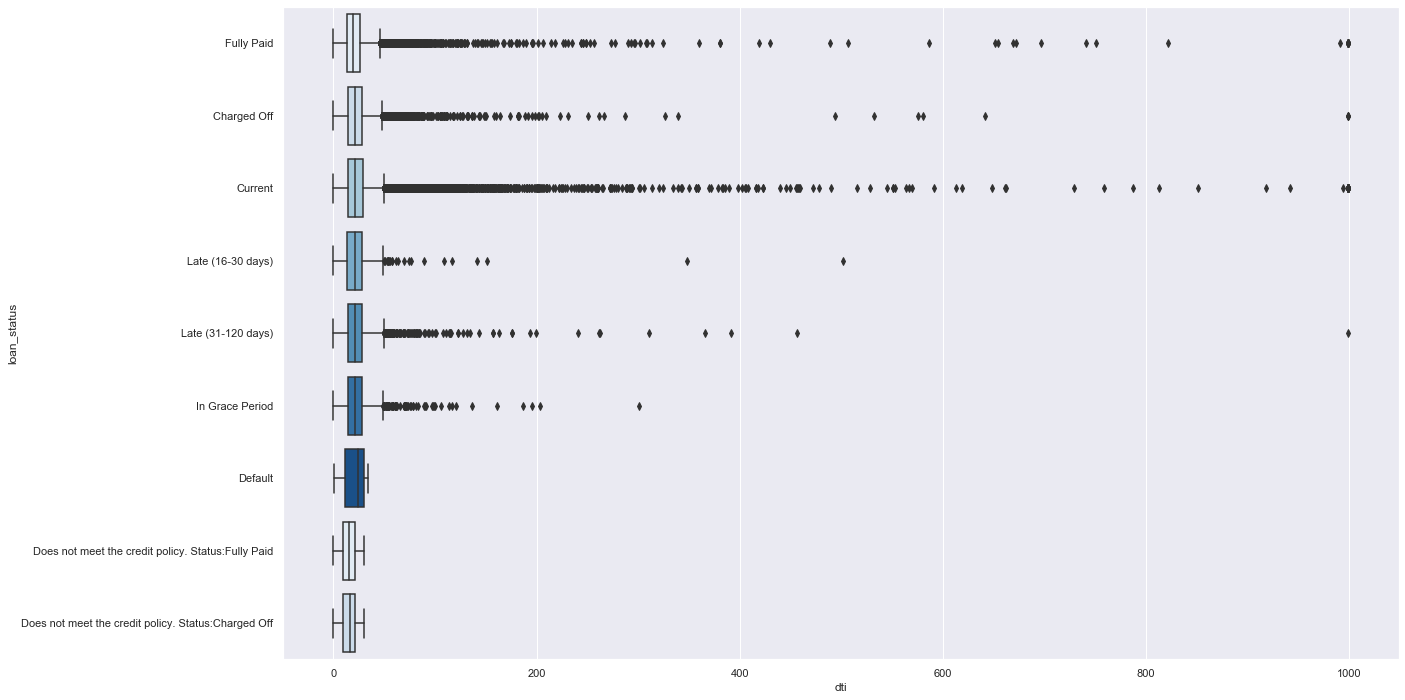

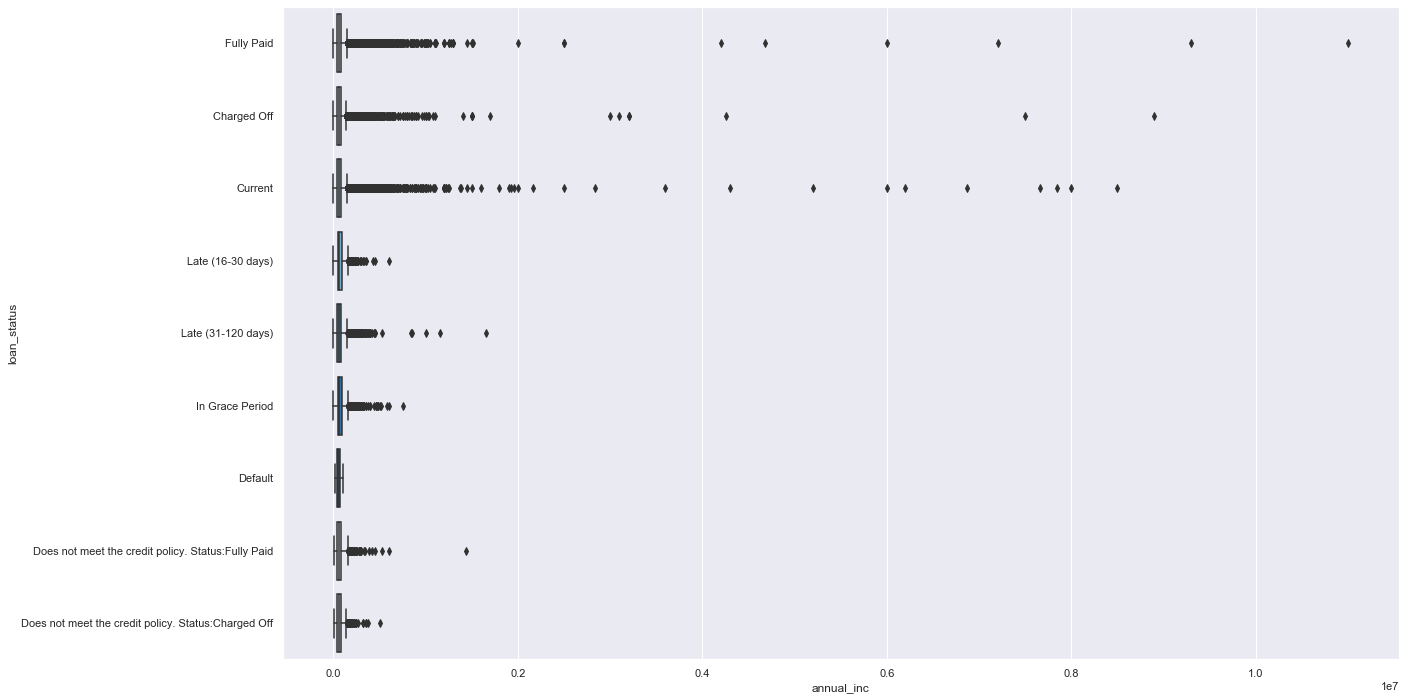

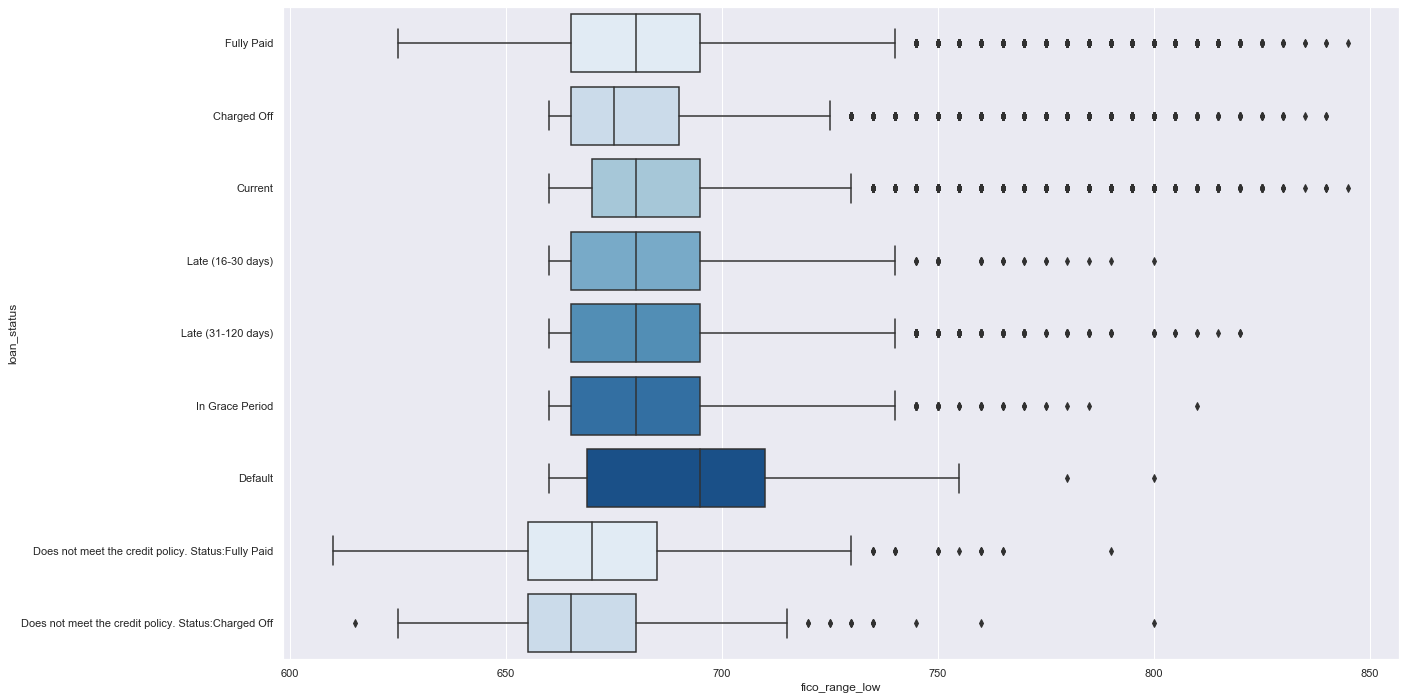

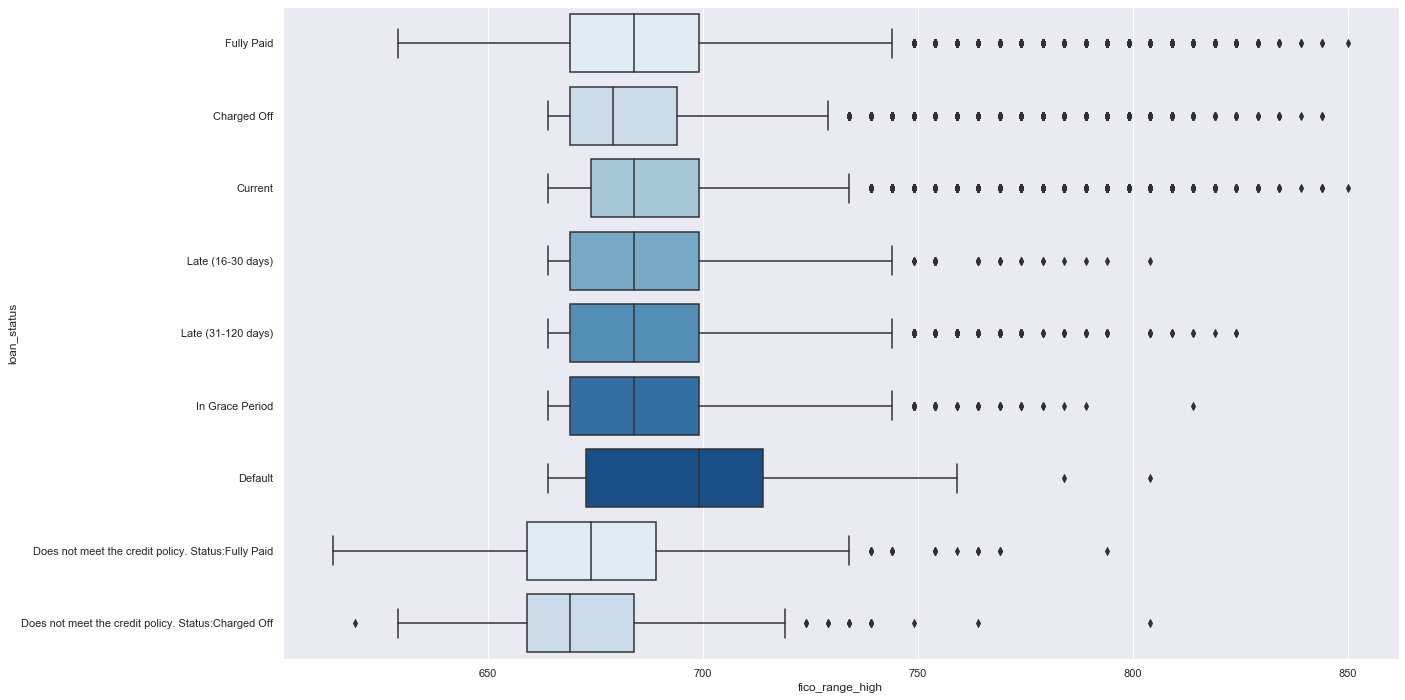

In [101]:
for i in state_box:
    plt.figure()
    sns.boxplot(x=i, y='loan_status' , data=df, palette = sns.color_palette("Blues", n_colors=7))
    

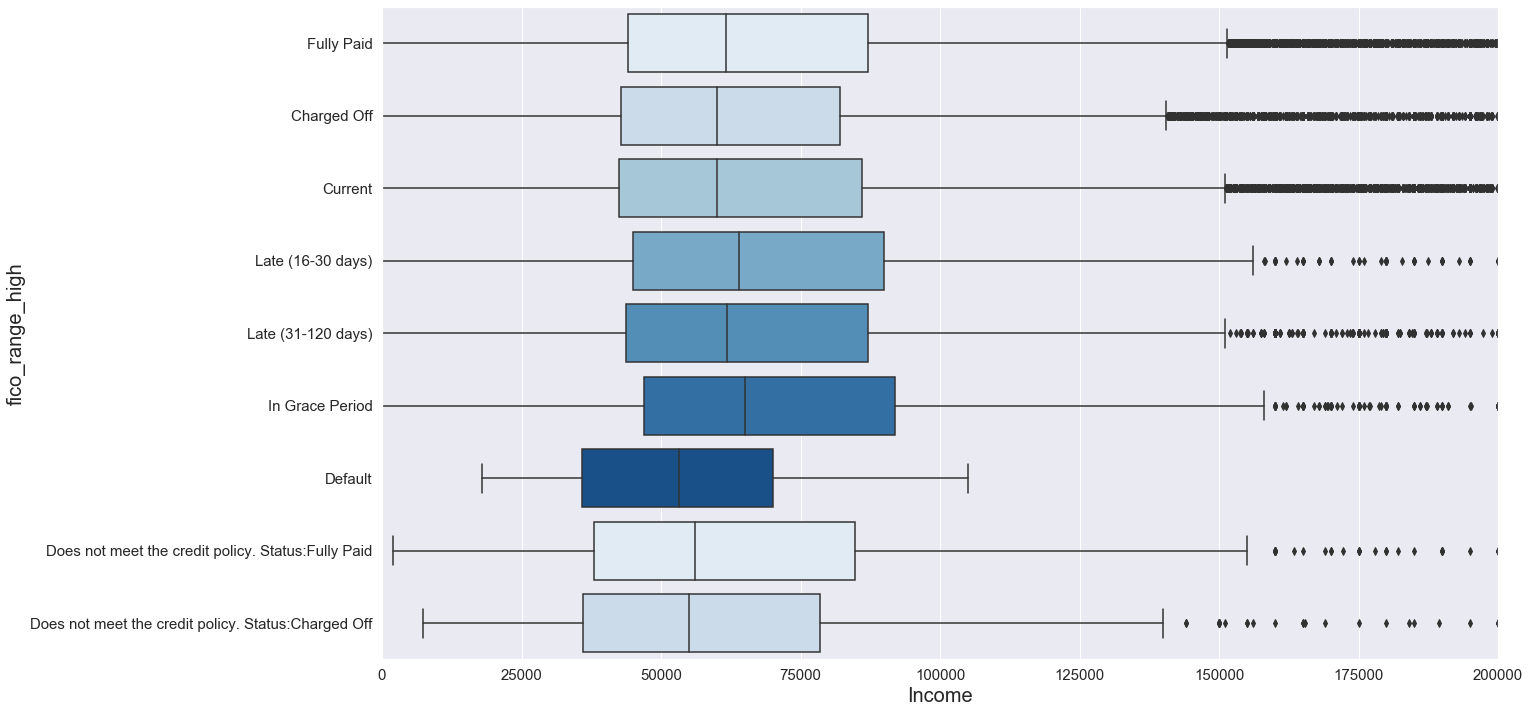

In [113]:
#Loan Status and Income
sns.boxplot(x='annual_inc', y='loan_status' , data=df, palette = sns.color_palette("Blues", n_colors=7))
plt.xlim(0,200000)
plt.xlabel('Income',fontsize = 20)
plt.ylabel('Loan Status')
plt.ylabel(f, fontsize=20)
plt.tick_params(labelsize=15)

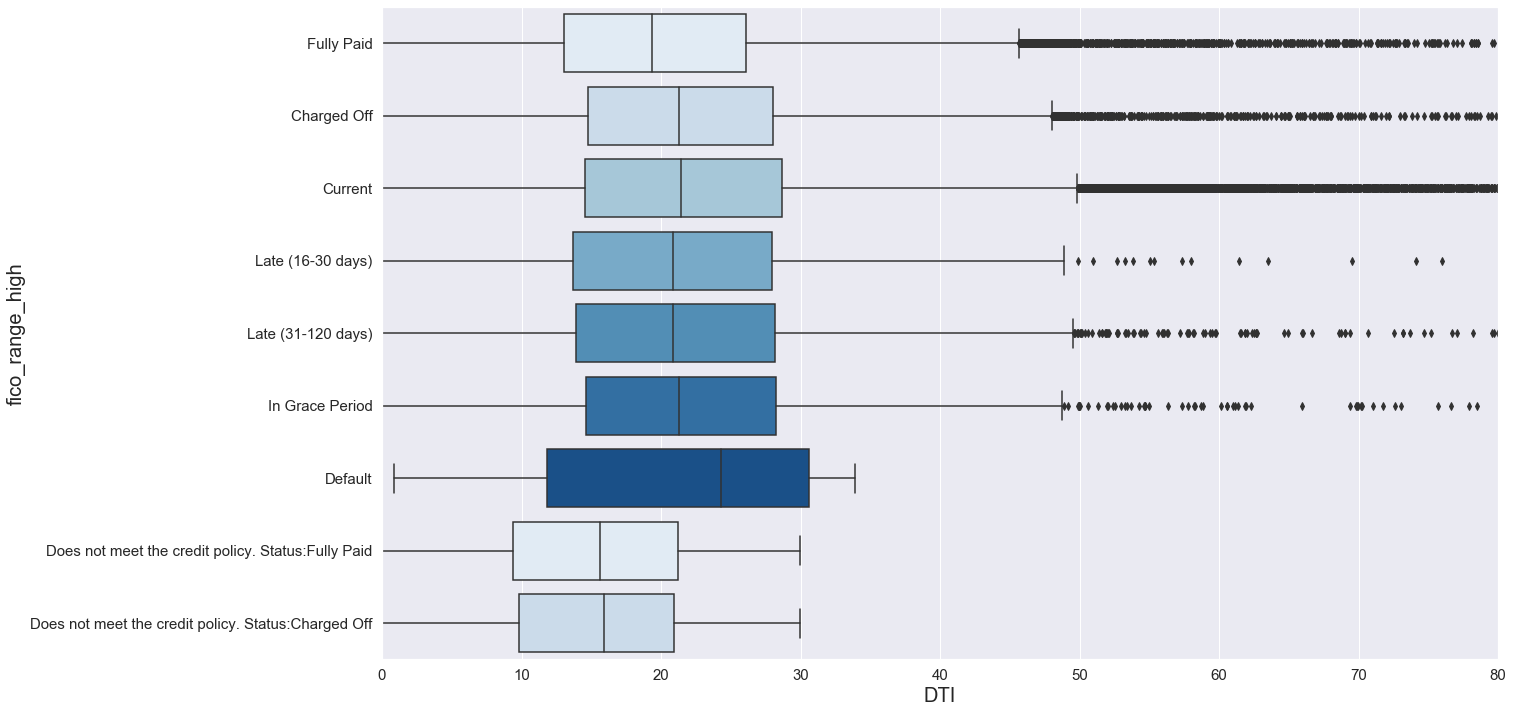

In [107]:
#Loan Status and DTI
sns.boxplot(x='dti', y='loan_status' , data=df, palette = sns.color_palette("Blues", n_colors=7))
plt.xlim(0,80)
plt.xlabel('DTI',fontsize = 20)
plt.ylabel(f, fontsize=20)
plt.tick_params(labelsize=15)

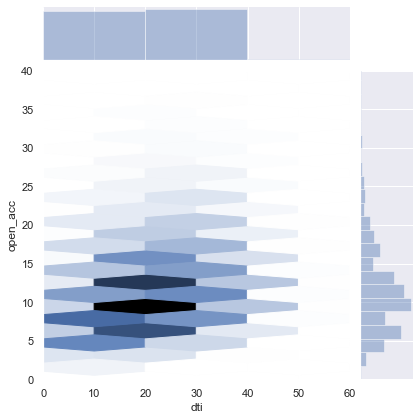

In [110]:
sns.jointplot(x='dti', y='open_acc',kind='hex', data=df, color='b', xlim=(0,60), ylim=(0,40))

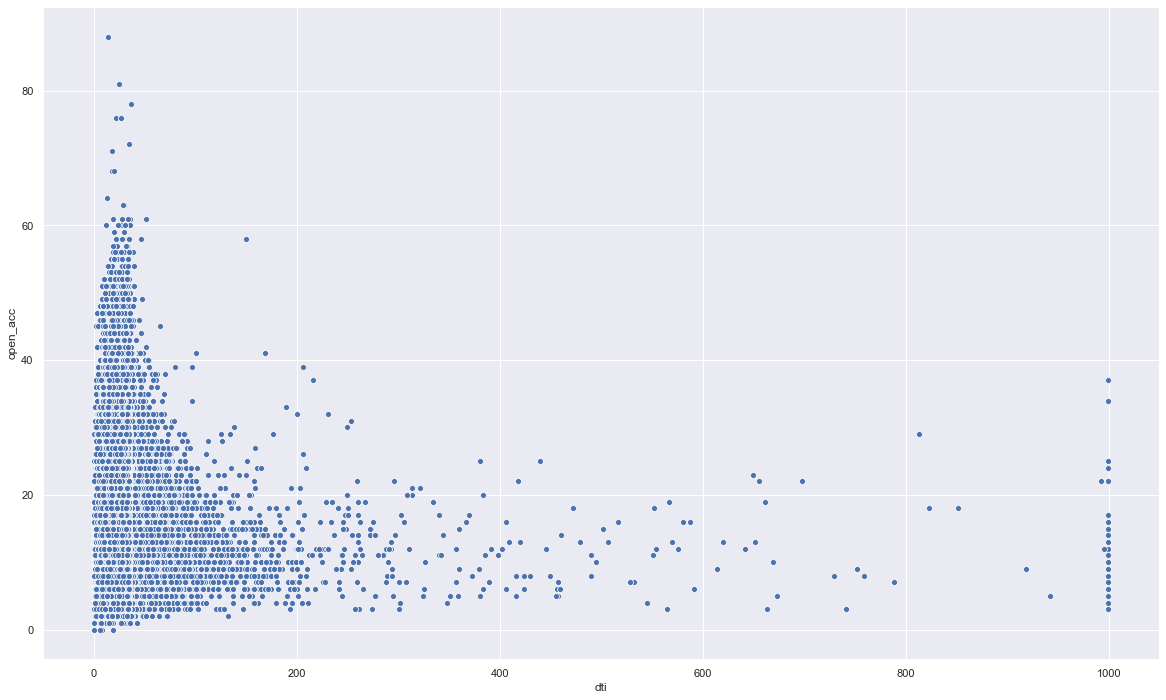

In [112]:
sns.scatterplot(x='dti', y='open_acc', data=df)

In [116]:
# add unemployment datatable
unemployment = pd.read_csv('unemployment.csv')

In [117]:
# change format to month date columns, change name of month column to month
unemployment = pd.melt(unemployment, id_vars = ['Year'],value_name = 'unemployment_rate')
unemployment = unemployment.rename(columns = {'variable':'Month'})
unemployment['Year'] = unemployment['Year'].astype(str)
unemployment['date'] = unemployment['Month'].str.cat(unemployment['Year'],sep = '-')
unemployment['date'] = unemployment['date'].apply(lambda x: dt.strptime(x,'%b-%Y').date())
unemployment['date'] = pd.to_datetime(unemployment['date'])
unemployment

,Year,Month,unemployment_rate,date
0,2000,Jan,4.0,2000-01-01
1,2001,Jan,4.2,2001-01-01
2,2002,Jan,5.7,2002-01-01
3,2003,Jan,5.8,2003-01-01
4,2004,Jan,5.7,2004-01-01
5,2005,Jan,5.3,2005-01-01
6,2006,Jan,4.7,2006-01-01
7,2007,Jan,4.6,2007-01-01
8,2008,Jan,5.0,2008-01-01
9,2009,Jan,7.8,2009-01-01


In [118]:
# add unemployment rate to main dataframe
data['date'] = data['issue_d']
data = pd.merge(data,unemployment[['date','unemployment_rate','Year']], on = 'date', how = 'inner')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
